# Installation du connecteur à Snowflake

In [103]:
# pip install --upgrade snowflake-connector-python


# CONNECTION A SNOWFLAKE

In [104]:
# import snowflake.connector
# from dotenv import load_dotenv
# import os 
# load_dotenv()

In [105]:
# snow_paswword = os.environ["SNOWFLAKE_PASSWORD"]

# conn = snowflake.connector.connect(
#     user="PAGETO",
#     password=snow_paswword,
#     account="IOXBEAF-ER47153"
#     )

# CONNECTION A MA DATABASE "ANALYTICS" SUR SNOWFLAKE

In [ ]:
# conn.cursor().execute("USE DATABASE ANALYTICS")

In [ ]:
# conn.cursor().execute("USE SCHEMA DBT_PPAGET")

# IMPORT DE MES VIEWS STAGING

In [108]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go 


In [109]:
#Je passe en commentaire car ma connexion à snowflake a expirée avec la fin de la période d'essai
# stg_flight_summary_data = conn.cursor().execute("SELECT * FROM stg_flight_summary_data").fetch_pandas_all()
# stg_flight_summary_data.head()

In [110]:
# stg_individual_flights = conn.cursor().execute("SELECT * FROM stg_individual_flights").fetch_pandas_all()
# stg_individual_flights.head()

In [111]:
#Je télécharge mes views staging en format .csv afin de pouvoir les ré-importer quand Snowflake et DBT auront atteint la fin de leur période d'essai et que, de fait, les données ne seront plus connectées
# stg_flight_summary_data.to_csv("stg_flight_summary_data.csv",index=False)
# stg_individual_flights.to_csv("stg_individual_flights.csv",index=False)

In [112]:
#J'importe ma view enregistrée en local sur un .csv car ma connexion à snowflake a expirée avec la fin de la période d'essai
stg_flight_summary_data = pd.read_csv("stg_flight_summary_data.csv")
stg_flight_summary_data.head()

,index,DATE,ASM_DOMESTIC,ASM_INTERNATIONAL,FLIGHTS_DOMESTIC,FLIGHTS_INTERNATIONAL,PASSENGERS_DOMESTIC,PASSENGERS_INTERNATIONAL,RPM_DOMESTIC,RPM_INTERNATIONAL,AIRLINE_CODE,AIRPORT_CODE
0,0,2002-10-01,59854,0.0,774,0.0,60464,59.0,38363,0.0,FA,FKT
1,1,2002-11-01,55009,0.0,733,0.0,57649,0.0,36286,0.0,FA,FKT
2,2,2002-12-01,56586,0.0,745,0.0,66240,0.0,41907,0.0,FA,FKT
3,3,2003-01-01,57448,0.0,754,0.0,55317,4.0,35118,0.0,FA,FKT
4,4,2003-02-01,54006,0.0,674,0.0,53216,65.0,33724,0.0,FA,FKT


In [113]:
stg_individual_flights = pd.read_csv("stg_individual_flights.csv")
stg_individual_flights.head()

,FLIGHT_ID,AIRLINE_CODE,DEPARTURE_AIRPORT_CODE,DESTINATION_AIRPORT_CODE,AIRCRAFT_ID
0,100001,FA,FKT,NSA,12d
1,100002,FA,FKT,NSA,12d
2,100003,FA,FKT,NSA,12d
3,100004,FA,FKT,NSA,12d
4,100005,FA,FKT,NSA,12d


# IMPORT DE MES TABLES DIMENSIONS

In [114]:
# dim_aircrafts = conn.cursor().execute("SELECT * FROM dim_aircrafts").fetch_pandas_all()
# dim_aircrafts

In [115]:
# dim_airlines = conn.cursor().execute("SELECT * FROM dim_airlines").fetch_pandas_all()
# dim_airlines

In [116]:
# dim_airports = conn.cursor().execute("SELECT * FROM dim_airports").fetch_pandas_all()
# dim_airports

In [117]:
#Je télécharge mes tables dimensions en format .csv afin de pouvoir les ré-importer quand Snowflake et DBT auront atteint la fin de leur période d'essai et que, de fait, les données ne seront plus connectées
# dim_aircrafts.to_csv("dim_aircrafts.csv",index=False)
# dim_airlines.to_csv("dim_airlines.csv",index=False)
# dim_airports.to_csv("dim_airports.csv",index=False)


In [118]:
dim_aircrafts = pd.read_csv("dim_aircrafts.csv")
dim_aircrafts

,AIRCRAFT_ID,AIRCRAFT_TYPE,MASS,LENGHT,COST,CAPACITY
0,12d,Flockinator,1000000,10000,100000000,1000
1,12a,Miniflock,50000,2000,2000000,200
2,g72,Goose,200000,5000,3000000,500
3,t10,Thundercat,1500000,20000,400000000,2000
4,b23,Bezantium,4000000,100000,1000000000,5000


In [119]:
dim_airlines = pd.read_csv("dim_airlines.csv")
dim_airlines

,AIRLINE_CODE,AIRLINE_NAME,MARKET_CAP,EMPLOYEES,AGE
0,FA,Flock Air,1000000000,2000000,10
1,GA,Goose Airways,50000000,30000,6
2,AA,Amazon Airlines,2000000000,10000000,22


In [120]:
dim_airports = pd.read_csv("dim_airports.csv")
dim_airports

,AIRPORT_CODE,AIRPORT_NAME,AIRPORT_EMPLOYEES,AIRPORT_SIZE
0,FKT,Flocktopia,1000000,2000000
1,NSA,Nestland Airport,20000,50000
2,AMP,Amazon Mothership,100000,10000


# IMPORT DE MES TABLES FACTS

In [121]:
# fct_aircrafts = conn.cursor().execute("SELECT * FROM fct_aircrafts ORDER BY NB_FLIGHTS DESC").fetch_pandas_all()
# fct_aircrafts

In [124]:
# fct_airlines = conn.cursor().execute("SELECT * FROM fct_airlines").fetch_pandas_all()
# fct_airlines

In [127]:
# fct_airports = conn.cursor().execute("SELECT * FROM fct_airports").fetch_pandas_all()
# fct_airports

In [130]:
# fct_capacity = conn.cursor().execute("SELECT * FROM fct_capacity ORDER BY AIRPORT_CAPACITY DESC").fetch_pandas_all()
# fct_capacity

In [133]:
# fct_croissance = conn.cursor().execute("SELECT * FROM fct_croissance").fetch_pandas_all().sort_values('BEST_TAUX_CROISSANCE')
# fct_croissance

In [137]:
# fct_croissance_all_years = conn.cursor().execute("SELECT * FROM fct_croissance_all_years").fetch_pandas_all()
# fct_croissance_all_years.head()

In [ ]:
#Je télécharge mes tables facts en format .csv afin de pouvoir les ré-importer quand Snowflake et DBT auront atteint la fin de leur période d'essai et que, de fait, les données ne seront plus connectées
# fct_aircrafts.to_csv("fct_aircrafts.csv",index=False)

# fct_airlines.to_csv("fct_airlines.csv",index=False)

# fct_airports.to_csv("fct_airports.csv",index=False)

# fct_capacity.to_csv("fct_capacity.csv",index=False)

# fct_croissance.to_csv("fct_croissance.csv",index=False)

# fct_croissance_all_years.to_csv("fct_croissance_all_years.csv",index=False)

In [122]:
fct_aircrafts = pd.read_csv("fct_aircrafts.csv")
fct_aircrafts

,AIRCRAFT_ID,AIRCRAFT_TYPE,NB_FLIGHTS
0,g72,Goose,1008
1,t10,Thundercat,553
2,12a,Miniflock,277
3,b23,Bezantium,240
4,12d,Flockinator,192


<Axes: xlabel='AIRCRAFT_TYPE', ylabel='NB_FLIGHTS'>

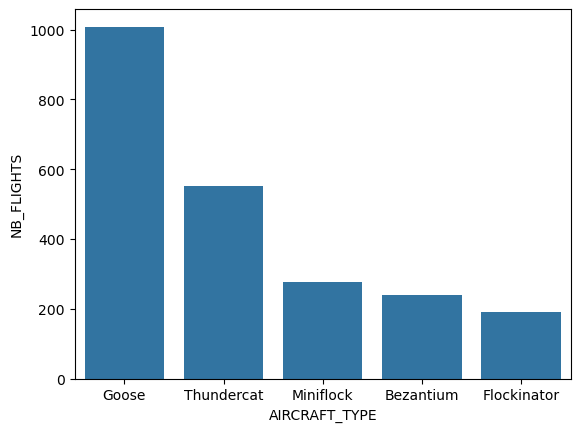

In [123]:
sns.barplot(data=fct_aircrafts,
            x= "AIRCRAFT_TYPE",
            y= "NB_FLIGHTS")


In [125]:
fct_airlines = pd.read_csv("fct_airlines.csv")
fct_airlines

,AIRLINE_CODE,AIRLINE_NAME,YEAR,REVENUE,METRIC
0,AA,Amazon Airlines,2015,9175044.0,domestic
1,FA,Flock Air,2016,13405774.0,domestic
2,GA,Goose Airways,2016,34637841.0,domestic
3,AA,Amazon Airlines,2016,2792855.0,international
4,FA,Flock Air,2016,3912894.0,international
5,GA,Goose Airways,2015,15219579.0,international
6,AA,Amazon Airlines,2015,11912594.0,total
7,FA,Flock Air,2016,17318668.0,total
8,GA,Goose Airways,2016,49260222.0,total


In [126]:
fig = px.bar(
    fct_airlines,
    x="AIRLINE_NAME",
    y="REVENUE",
    color="METRIC",
    barmode="group",
    text="YEAR"       # ← Ajoute l’année sur chaque barre
)

# Style : placer le texte AU-DESSUS des barres
fig.update_traces(
    textposition="outside",
    textfont_size=12
)

fig.update_layout(
    title="Revenue par compagnie aérienne (avec année affichée)",
    bargroupgap=0.05
)

fig.update_layout(
    width=1000,
    height=800
)
fig.show()

In [128]:
fct_airports = pd.read_csv("fct_airports.csv")
fct_airports

,AIRPORT_CODE,AIRPORT_NAME,PASSENGERS_NB
0,FKT,Flocktopia,430959170.0
1,NSA,Nestland Airport,179064722.0
2,AMP,Amazon Mothership,80033991.0


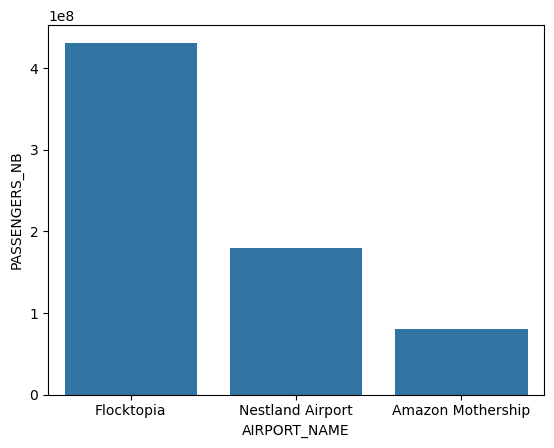

In [129]:
sns.barplot(data = fct_airports,
            x="AIRPORT_NAME",
            y="PASSENGERS_NB")

plt.show()

In [131]:
fct_capacity = pd.read_csv("fct_capacity.csv")
fct_capacity

,AIRPORT_CODE,AIRPORT_CAPACITY
0,AMP,2423400
1,NSA,1999700
2,FKT,1685200
3,AA,6500


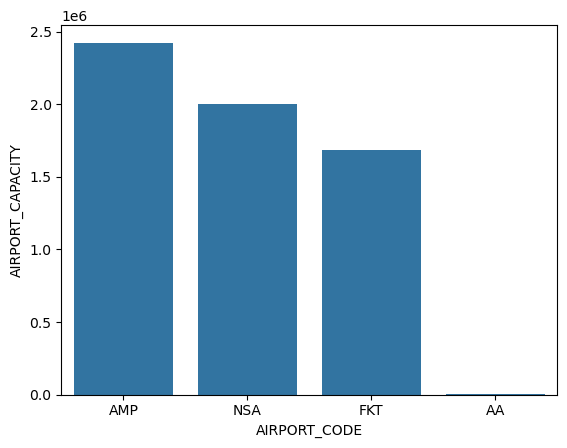

In [132]:
sns.barplot(data=fct_capacity,
            x="AIRPORT_CODE",
            y="AIRPORT_CAPACITY")

plt.show()

In [134]:
fct_croissance = pd.read_csv("fct_croissance.csv")
fct_croissance

,AIRLINE_CODE,AIRLINE_NAME,BEST_YEAR,BEST_TAUX_CROISSANCE
0,FA,Flock Air,2016,16.04
1,GA,Goose Airways,2010,20.67
2,AA,Amazon Airlines,2012,46.02


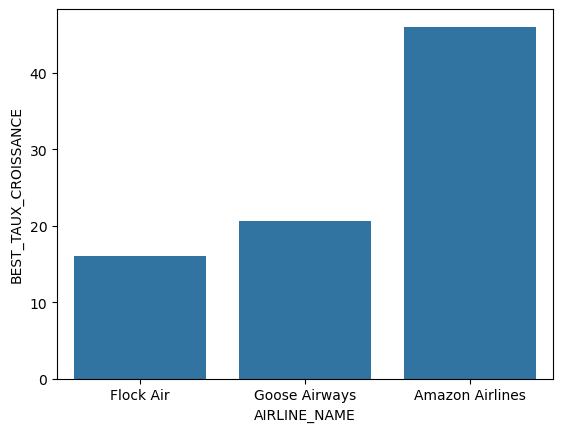

In [135]:
sns.barplot(data=fct_croissance,
            x="AIRLINE_NAME",
            y="BEST_TAUX_CROISSANCE")

plt.show()

In [136]:
fig = px.bar(
    fct_croissance,
    x="AIRLINE_NAME",
    y="BEST_TAUX_CROISSANCE",
    barmode="group",
    color="AIRLINE_NAME",
    text="BEST_YEAR"       # ← Ajoute l’année sur chaque barre
)

# Style : placer le texte AU-DESSUS des barres
fig.update_traces(
    textposition="outside",
    textfont_size=12
)

fig.update_layout(
    title="Meilleure année de croissance)"
)

fig.update_layout(
    width=1000,
    height=800
)
fig.show()

In [138]:
fct_croissance_all_years = pd.read_csv("fct_croissance_all_years.csv")
fct_croissance_all_years.head()

,AIRLINE_CODE,AIRLINE_NAME,YEAR,AVG_ASM_DOMESTIC,PREVIOUS_YEAR,TAUX_CROISSANCE
0,AA,Amazon Airlines,2002,315931.000000,NaN,NaN
1,AA,Amazon Airlines,2003,295645.527778,315931.000000,-6.42
2,AA,Amazon Airlines,2004,296641.388889,295645.527778,0.34
3,AA,Amazon Airlines,2005,255289.083333,296641.388889,-13.94
4,AA,Amazon Airlines,2006,270788.361111,255289.083333,6.07
